Ken Furudate

In [ ]:
import scanpy as sc
import squidpy as sq

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = ['Arial'] + plt.rcParams['font.sans-serif']
plt.rcParams["font.size"] = 20
plt.rcParams['pdf.fonttype'] = 42 

import os
from pathlib import Path
import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
        
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.8.2 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7
squidpy==1.2.2


In [ ]:
datadir = "/data/spatial/"
in_f = "integrated_data.h5ad"

data = sc.read_h5ad(datadir + in_f)
data

AnnData object with n_obs × n_vars = 3637 × 4000
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'pathology', 'category', 'cluster', 'sample', 'n_counts', 'batch', '_scvi_batch', '_scvi_labels', 'leiden', 'sample_density', '_scvi_raw_norm_scaling'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells-0-0', 'n_cells-1-0', 'n_cells-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pathology_colors', 'sample_colors', 'sample_density_params', 'umap', 'wilcoxon'
    obsm: 'X_pca', 'X_scvi', 'X_umap', 'spatial'
    layers: 'counts', 'scvi_expr'
    obsp: 'connectivities', 'distances'

In [ ]:
adata = data[data.obs['sample']=="A"]
bdata = data[data.obs['sample']=="B"]
cdata = data[data.obs['sample']=="C"]

In [ ]:
adata = adata[adata.obs['category']=="tumor"]
bdata = bdata[bdata.obs['category']=="tumor"]
cdata = cdata[cdata.obs['category']=="tumor"]

In [ ]:
adata.obs["region"] = adata.obs["leiden"].copy().astype(str)
adata.obs.replace({"region": {"0": "Predominant_pri"}}, inplace=True)
adata.obs.replace({"region": {"2": "Predominant_pri"}}, inplace=True)
adata.obs.replace({"region": {"11": "Predominant_pri"}}, inplace=True)

adata.obs.replace({"region": {"1": "Metastatic_pri"}}, inplace=True)
adata.obs.replace({"region": {"3": "Metastatic_pri"}}, inplace=True)
adata.obs.replace({"region": {"4": "Metastatic_pri"}}, inplace=True)
adata.obs.replace({"region": {"5": "Metastatic_pri"}}, inplace=True)
adata.obs.replace({"region": {"6": "Metastatic_pri"}}, inplace=True)
adata.obs.replace({"region": {"7": "Metastatic_pri"}}, inplace=True)
adata.obs.replace({"region": {"8": "Metastatic_pri"}}, inplace=True)
adata.obs.replace({"region": {"9": "Metastatic_pri"}}, inplace=True)
adata.obs.replace({"region": {"10": "Metastatic_pri"}}, inplace=True)

bdata.obs["region"] = bdata.obs["leiden"].copy().astype(str)
bdata.obs.replace({"region": {"0": "Predominant_pri"}}, inplace=True)
bdata.obs.replace({"region": {"2": "Predominant_pri"}}, inplace=True)
bdata.obs.replace({"region": {"11": "Predominant_pri"}}, inplace=True)

bdata.obs.replace({"region": {"1": "Metastatic_pri"}}, inplace=True)
bdata.obs.replace({"region": {"3": "Metastatic_pri"}}, inplace=True)
bdata.obs.replace({"region": {"4": "Metastatic_pri"}}, inplace=True)
bdata.obs.replace({"region": {"5": "Metastatic_pri"}}, inplace=True)
bdata.obs.replace({"region": {"6": "Metastatic_pri"}}, inplace=True)
bdata.obs.replace({"region": {"7": "Metastatic_pri"}}, inplace=True)
bdata.obs.replace({"region": {"8": "Metastatic_pri"}}, inplace=True)
bdata.obs.replace({"region": {"9": "Metastatic_pri"}}, inplace=True)
bdata.obs.replace({"region": {"10": "Metastatic_pri"}}, inplace=True)


In [ ]:
adata.uns["spatial"] = pickle_load(datadir + 'adata_uns_spatial.pickle') 
bdata.uns["spatial"] = pickle_load(datadir + 'bdata_uns_spatial.pickle') 
cdata.uns["spatial"] = pickle_load(datadir + 'cdata_uns_spatial.pickle') 
ddata.uns["spatial"] = pickle_load(datadir + 'ddata_uns_spatial.pickle') 

In [ ]:
sample_lst = ["A", "B", "C"]

In [ ]:
def set_param(input_data, sample):
  scale = input_data.uns['spatial'][f"{sample}"]['scalefactors']['tissue_hires_scalef']
  img = sq.im.ImageContainer(input_data.uns['spatial'][f"{sample}"]['images']['hires'],
                           scale=scale, 
                           library_id=f"{sample}")
  img.show()
  return scale, img

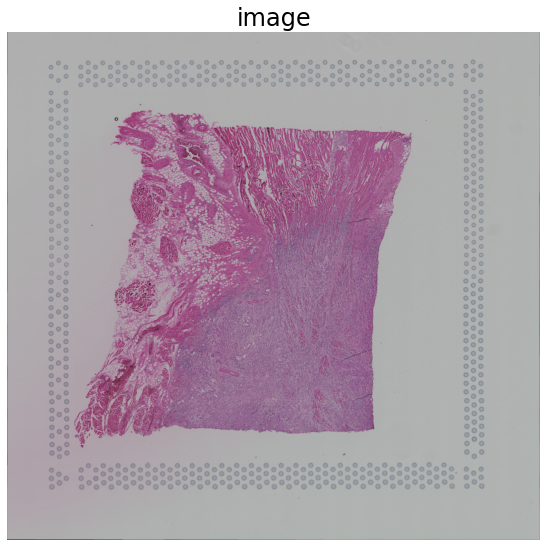

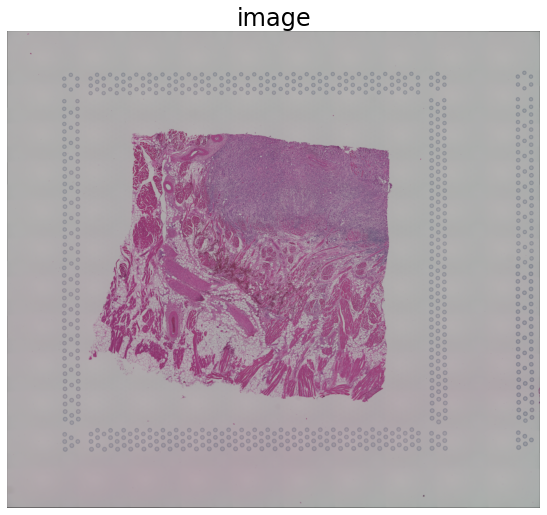

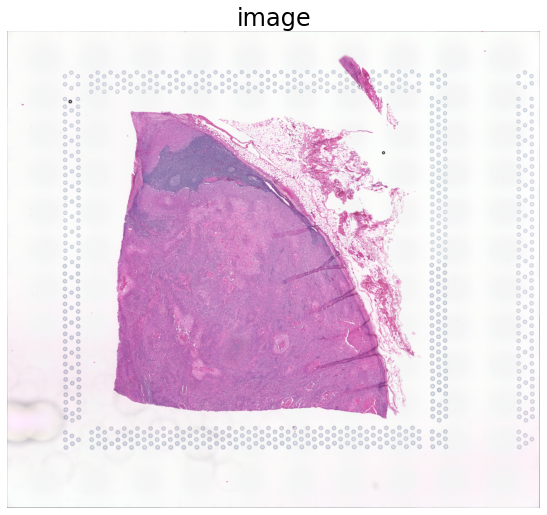

In [ ]:
scale_a, img_a = set_param(adata, "A")
scale_b, img_b = set_param(bdata, "B")
scale_c, img_c = set_param(cdata, "C")

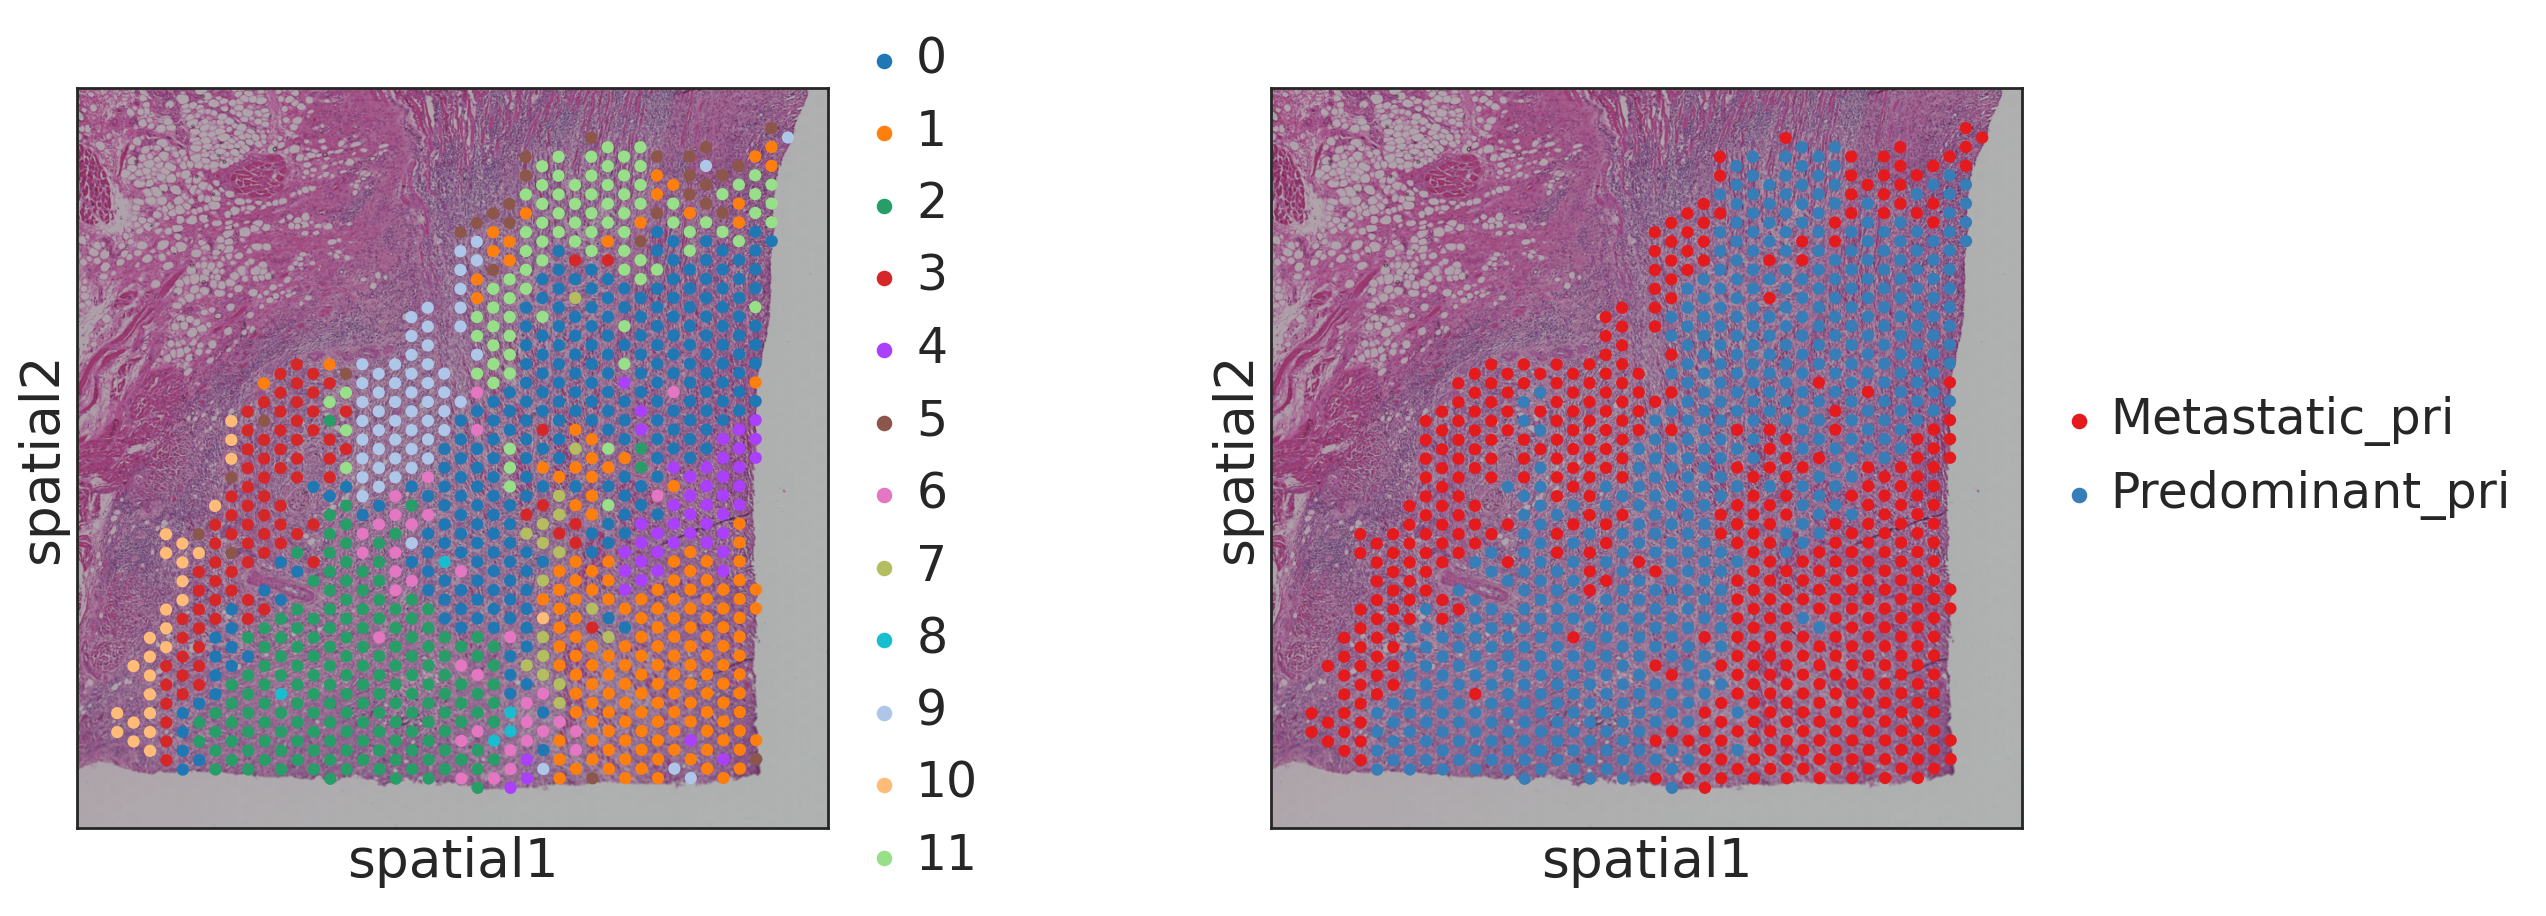

In [ ]:
sc.pl.spatial(adata=adata, 
              color=["integrated spatial transcriptome cluster", 'integration_analysis'],
              na_in_legend=False,
              )

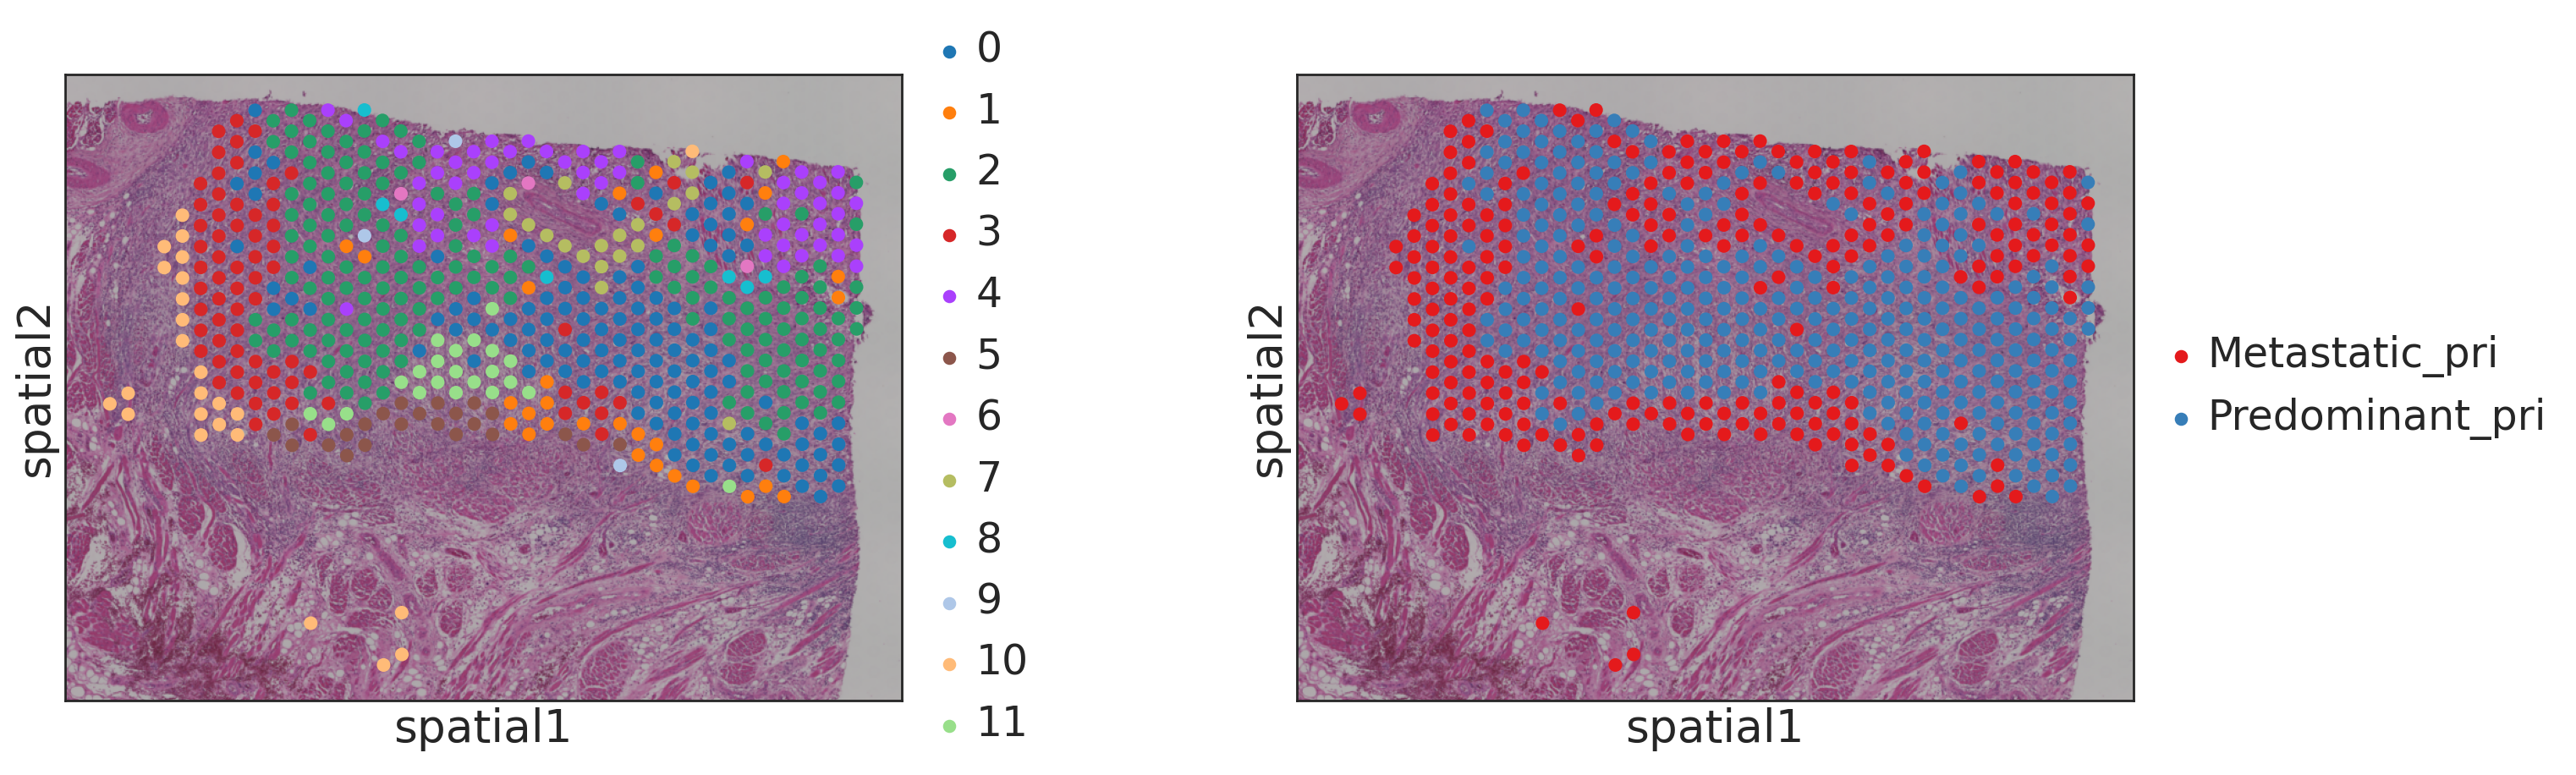

In [ ]:
sc.pl.spatial(adata=bdata, 
              color=["integrated spatial transcriptome cluster", 'integration_analysis'],
              na_in_legend=False,
              )

In [ ]:
count_a = pd.read_table("Fig.3b_SampleA.txt")
count_b = pd.read_table("Fig.3b_SampleB.txt")
count_c = pd.read_table("Fig.3b_SampleC.txt")
count_a

Unnamed: 0      x      y  cell_n  \
0    AAACAGCTTTCAGAAG-1-0-0  18510  11009       3   
1    AAACAGGGTCTATATT-1-0-0  17982  10088       8   
2    AAACCGGGTAGGTACC-1-0-0  15996  11235       9   
3    AAACCTCATGAAGTTG-1-0-0  17184  12388       8   
4    AAACTTGCAAACGTAT-1-0-0  17188  10547       9   
..                      ...    ...    ...     ...   
978  TTGTGGCCCTGACAGT-1-0-0  11752  16752       8   
979  TTGTGGTAGGAGGGAT-1-0-0  15999   9393      10   
980  TTGTTAGCAAATTCGA-1-0-0  14135  15835       9   
981  TTGTTCAGTGTGCTAC-1-0-0  11225  15369       6   
982  TTGTTTCCATACAACT-1-0-0  16129  10545       9   

                                             centroids  OSCC cell  CAF  MAF  
0    ['AAACAGCTTTCAGAAG-1-0-0_0' 'AAACAGCTTTCAGAAG-...          1    0    0  
1    ['AAACAGGGTCTATATT-1-0-0_0' 'AAACAGGGTCTATATT-...          1    0    0  
2    ['AAACCGGGTAGGTACC-1-0-0_0' 'AAACCGGGTAGGTACC-...          2    0    0  
3    ['AAACCTCATGAAGTTG-1-0-0_0' 'AAACCTCATGAAGTTG-...          4    0    0  
4    ['AAACTTGCAAACGTAT-1-0-0_0' 'AAACTTGCAAACGTAT-...          1    1    0  
..                                                 ...        ...  ...  ...  
978  ['TTGTGGCCCTGACAGT-1-0-0_0' 'TTGTGGCCCTGACAGT-...          4    1    1  
979  ['TTGTGGTAGGAGGGAT-1-0-0_0' 'TTGTGGTAGGAGGGAT-...          2    0    2  
980  ['TTGTTAGCAAATTCGA-1-0-0_0' 'TTGTTAGCAAATTCGA-...          2    1    2  
981  ['TTGTTCAGTGTGCTAC-1-0-0_0' 'TTGTTCAGTGTGCTAC-...          4    0    0  
982  ['TTGTTTCCATACAACT-1-0-0_0' 'TTGTTTCCATACAACT-...          6    1    1  

[983 rows x 8 columns]

In [ ]:
count_b

Unnamed: 0     x     y  cell_n  \
0    AAACAGAGCGACTCCT-1-1-0  4034  9346       6   
1    AAAGGTAAGCTGTACC-1-1-0  3236  9807       9   
2    AAAGTGTGATTTATCT-1-1-0  4041  5881      10   
3    AAAGTTGACTCCCGTA-1-1-0  3908  6111       6   
4    AAATAACCATACGGGA-1-1-0  4432  9347       9   
..                      ...   ...   ...     ...   
567  TTGACGCTCCATGAGC-1-1-0  3575  6226       8   
568  TTGATGTGTAGTCCCG-1-1-0  4302  8192       4   
569  TTGCCGGTGATCCCTC-1-1-0  3834  9692       6   
570  TTGCGTGAACGCTTAG-1-1-0  3901  9346       7   
571  TTGGCCTAGAATTTCG-1-1-0  4831  9117       9   

                                             centroids  OSCC cell  CAF  MAF  
0    ['AAACAGAGCGACTCCT-1-1-0_0' 'AAACAGAGCGACTCCT-...          3    0    0  
1    ['AAAGGTAAGCTGTACC-1-1-0_0' 'AAAGGTAAGCTGTACC-...          3    0    0  
2    ['AAAGTGTGATTTATCT-1-1-0_0' 'AAAGTGTGATTTATCT-...          6    3    1  
3    ['AAAGTTGACTCCCGTA-1-1-0_0' 'AAAGTTGACTCCCGTA-...          3    2    0  
4    ['AAATAACCATACGGGA-1-1-0_0' 'AAATAACCATACGGGA-...          6    0    0  
..                                                 ...        ...  ...  ...  
567  ['TTGACGCTCCATGAGC-1-1-0_0' 'TTGACGCTCCATGAGC-...          1    0    0  
568  ['TTGATGTGTAGTCCCG-1-1-0_0' 'TTGATGTGTAGTCCCG-...          0    2    1  
569  ['TTGCCGGTGATCCCTC-1-1-0_0' 'TTGCCGGTGATCCCTC-...          3    0    1  
570  ['TTGCGTGAACGCTTAG-1-1-0_0' 'TTGCGTGAACGCTTAG-...          3    0    0  
571  ['TTGGCCTAGAATTTCG-1-1-0_0' 'TTGGCCTAGAATTTCG-...          1    2    1  

[572 rows x 8 columns]

In [ ]:
count_c

Unnamed: 0     x     y  cell_n  \
0     AAACACCAATAACTGC-1-1  8976  4176       9   
1     AAACAGCTTTCAGAAG-1-1  9636  6025       6   
2     AAACAGGGTCTATATT-1-1  9372  5563       7   
3     AAACCGTTCGTCCAGG-1-1  7448  4981       6   
4     AAACCTCATGAAGTTG-1-1  8971  6717      12   
...                    ...   ...   ...     ...   
2073  TTGTTAGCAAATTCGA-1-1  7441  8447       9   
2074  TTGTTCAGTGTGCTAC-1-1  5981  8213       8   
2075  TTGTTGTGTGTCAAGA-1-1  5119  7403       8   
2076  TTGTTTCACATCCAGG-1-1  7449  4288       6   
2077  TTGTTTCATTAGTCTA-1-1  8246  4059      14   

                                              centroids  OSCC cell  CAF  MAF  
0     ['AAACACCAATAACTGC-1-1_0' 'AAACACCAATAACTGC-1-...          1    1    0  
1     ['AAACAGCTTTCAGAAG-1-1_0' 'AAACAGCTTTCAGAAG-1-...          1    2    1  
2     ['AAACAGGGTCTATATT-1-1_0' 'AAACAGGGTCTATATT-1-...          2    0    0  
3     ['AAACCGTTCGTCCAGG-1-1_0' 'AAACCGTTCGTCCAGG-1-...          0    0    0  
4     ['AAACCTCATGAAGTTG-1-1_0' 'AAACCTCATGAAGTTG-1-...          0    0    0  
...                                                 ...        ...  ...  ...  
2073  ['TTGTTAGCAAATTCGA-1-1_0' 'TTGTTAGCAAATTCGA-1-...          0    0    0  
2074  ['TTGTTCAGTGTGCTAC-1-1_0' 'TTGTTCAGTGTGCTAC-1-...          3    0    0  
2075  ['TTGTTGTGTGTCAAGA-1-1_0' 'TTGTTGTGTGTCAAGA-1-...          2    0    0  
2076  ['TTGTTTCACATCCAGG-1-1_0' 'TTGTTTCACATCCAGG-1-...          1    1    0  
2077  ['TTGTTTCATTAGTCTA-1-1_0' 'TTGTTTCATTAGTCTA-1-...          1    1    0  

[2078 rows x 8 columns]

In [ ]:
sampleA_ = data.obs[data.obs["sample"] == "A"].copy()
sampleA_["Unnamed: 0"] = sampleA_.index
sampleA_

in_tissue  array_row  array_col     imagecol  \
AAACAGCTTTCAGAAG-1-0-0          1         43          9   889.867818   
AAACAGGGTCTATATT-1-0-0          1         47         13   815.422523   
AAACCGGGTAGGTACC-1-0-0          1         42         28   908.135611   
AAACCTCATGAAGTTG-1-0-0          1         37         19  1001.333685   
AAACTTGCAAACGTAT-1-0-0          1         45         19   852.523924   
...                           ...        ...        ...          ...   
TTGTGGCCCTGACAGT-1-0-0          1         18         60  1354.079907   
TTGTGGTAGGAGGGAT-1-0-0          1         50         28   759.245019   
TTGTTAGCAAATTCGA-1-0-0          1         22         42  1279.957935   
TTGTTCAGTGTGCTAC-1-0-0          1         24         64  1242.290717   
TTGTTTCCATACAACT-1-0-0          1         45         27   852.362262   

                           imagerow         pathology category    cluster  \
AAACAGCTTTCAGAAG-1-0-0  1496.180699             CA_PD    tumor  cluster_6   
AAACAGGGTCTATATT-1-0-0  1453.501963             CA_PD    tumor  cluster_6   
AAACCGGGTAGGTACC-1-0-0  1292.971716  CA_PD_&_fibrosis    tumor  cluster_6   
AAACCTCATGAAGTTG-1-0-0  1388.998873  CA_PD_&_fibrosis    tumor  cluster_5   
AAACTTGCAAACGTAT-1-0-0  1389.322197  CA_PD_&_fibrosis    tumor  cluster_6   
...                             ...               ...      ...        ...   
TTGTGGCCCTGACAGT-1-0-0   949.925207  CA_PD_&_fibrosis    tumor  cluster_5   
TTGTGGTAGGAGGGAT-1-0-0  1293.214209  CA_PD_&_fibrosis    tumor  cluster_2   
TTGTTAGCAAATTCGA-1-0-0  1142.545337    CA_PD_&_muscle    tumor  cluster_5   
TTGTTCAGTGTGCTAC-1-0-0   907.327302  CA_PD_&_fibrosis    tumor  cluster_2   
TTGTTTCCATACAACT-1-0-0  1303.722231  CA_PD_&_fibrosis    tumor  cluster_5   

                       sample  n_counts batch  _scvi_batch  _scvi_labels  \
AAACAGCTTTCAGAAG-1-0-0      A   46861.0     0            0             0   
AAACAGGGTCTATATT-1-0-0      A   53248.0     0            0             0   
AAACCGGGTAGGTACC-1-0-0      A   49741.0     0            0             0   
AAACCTCATGAAGTTG-1-0-0      A   39816.0     0            0             0   
AAACTTGCAAACGTAT-1-0-0      A   39005.0     0            0             0   
...                       ...       ...   ...          ...           ...   
TTGTGGCCCTGACAGT-1-0-0      A   18306.0     0            0             0   
TTGTGGTAGGAGGGAT-1-0-0      A    9972.0     0            0             0   
TTGTTAGCAAATTCGA-1-0-0      A   22596.0     0            0             0   
TTGTTCAGTGTGCTAC-1-0-0      A    9967.0     0            0             0   
TTGTTTCCATACAACT-1-0-0      A   24250.0     0            0             0   

                       leiden  sample_density  _scvi_raw_norm_scaling  \
AAACAGCTTTCAGAAG-1-0-0      2        0.299178                0.488448   
AAACAGGGTCTATATT-1-0-0      2        0.394160                0.427991   
AAACCGGGTAGGTACC-1-0-0      2        0.388597                0.478057   
AAACCTCATGAAGTTG-1-0-0      2        0.380648                0.550964   
AAACTTGCAAACGTAT-1-0-0      2        0.447035                0.610352   
...                       ...             ...                     ...   
TTGTGGCCCTGACAGT-1-0-0      0        0.961767                1.440300   
TTGTGGTAGGAGGGAT-1-0-0      3        0.132355                3.136763   
TTGTTAGCAAATTCGA-1-0-0      4        0.353786                1.196029   
TTGTTCAGTGTGCTAC-1-0-0     11        0.505471                2.930832   
TTGTTTCCATACAACT-1-0-0      2        0.992378                1.100231   

                       scvi_leiden              Unnamed: 0  
AAACAGCTTTCAGAAG-1-0-0           2  AAACAGCTTTCAGAAG-1-0-0  
AAACAGGGTCTATATT-1-0-0           2  AAACAGGGTCTATATT-1-0-0  
AAACCGGGTAGGTACC-1-0-0           2  AAACCGGGTAGGTACC-1-0-0  
AAACCTCATGAAGTTG-1-0-0           2  AAACCTCATGAAGTTG-1-0-0  
AAACTTGCAAACGTAT-1-0-0           2  AAACTTGCAAACGTAT-1-0-0  
...                            ...                     ...  
TTGTGGCCCTGACAGT-

In [ ]:
data_a_merge = pd.merge(count_a, sampleA_, on="Unnamed: 0", how='left')
data_a_merge

Unnamed: 0      x      y  cell_n  \
0    AAACAGCTTTCAGAAG-1-0-0  18510  11009       3   
1    AAACAGGGTCTATATT-1-0-0  17982  10088       8   
2    AAACCGGGTAGGTACC-1-0-0  15996  11235       9   
3    AAACCTCATGAAGTTG-1-0-0  17184  12388       8   
4    AAACTTGCAAACGTAT-1-0-0  17188  10547       9   
..                      ...    ...    ...     ...   
978  TTGTGGCCCTGACAGT-1-0-0  11752  16752       8   
979  TTGTGGTAGGAGGGAT-1-0-0  15999   9393      10   
980  TTGTTAGCAAATTCGA-1-0-0  14135  15835       9   
981  TTGTTCAGTGTGCTAC-1-0-0  11225  15369       6   
982  TTGTTTCCATACAACT-1-0-0  16129  10545       9   

                                             centroids  OSCC cell  CAF  MAF  \
0    ['AAACAGCTTTCAGAAG-1-0-0_0' 'AAACAGCTTTCAGAAG-...          1    0    0   
1    ['AAACAGGGTCTATATT-1-0-0_0' 'AAACAGGGTCTATATT-...          1    0    0   
2    ['AAACCGGGTAGGTACC-1-0-0_0' 'AAACCGGGTAGGTACC-...          2    0    0   
3    ['AAACCTCATGAAGTTG-1-0-0_0' 'AAACCTCATGAAGTTG-...          4    0    0   
4    ['AAACTTGCAAACGTAT-1-0-0_0' 'AAACTTGCAAACGTAT-...          1    1    0   
..                                                 ...        ...  ...  ...   
978  ['TTGTGGCCCTGACAGT-1-0-0_0' 'TTGTGGCCCTGACAGT-...          4    1    1   
979  ['TTGTGGTAGGAGGGAT-1-0-0_0' 'TTGTGGTAGGAGGGAT-...          2    0    2   
980  ['TTGTTAGCAAATTCGA-1-0-0_0' 'TTGTTAGCAAATTCGA-...          2    1    2   
981  ['TTGTTCAGTGTGCTAC-1-0-0_0' 'TTGTTCAGTGTGCTAC-...          4    0    0   
982  ['TTGTTTCCATACAACT-1-0-0_0' 'TTGTTTCCATACAACT-...          6    1    1   

     in_tissue  array_row  ...    cluster  sample  n_counts batch _scvi_batch  \
0            1         43  ...  cluster_6       A   46861.0     0           0   
1            1         47  ...  cluster_6       A   53248.0     0           0   
2            1         42  ...  cluster_6       A   49741.0     0           0   
3            1         37  ...  cluster_5       A   39816.0     0           0   
4            1         45  ...  cluster_6       A   39005.0     0           0   
..         ...        ...  ...        ...     ...       ...   ...         ...   
978          1         18  ...  cluster_5       A   18306.0     0           0   
979          1         50  ...  cluster_2       A    9972.0     0           0   
980          1         22  ...  cluster_5       A   22596.0     0           0   
981          1         24  ...  cluster_2       A    9967.0     0           0   
982          1         45  ...  cluster_5       A   24250.0     0           0   

    _scvi_labels leiden  sample_density _scvi_raw_norm_scaling  scvi_leiden  
0              0      2        0.299178               0.488448            2  
1              0      2        0.394160               0.427991            2  
2              0      2        0.388597               0.478057            2  
3              0      2        0.380648               0.550964            2  
4              0      2        0.447035               0.610352            2  
..           ...    ...             ...                    ...          ...  
978            0      0        0.961767               1.440300            0  
979            0      3        0.132355               3.136763            3  
980            0      4        0.353786               1.196029            4  
981            0     11        0.505471               2.930832           11  
982            0      2        0.992378               1.100231            2  

[983 rows x 25 columns]

In [ ]:
sampleB_ = data.obs[data.obs["sample"] == "B"].copy()
sampleB_["Unnamed: 0"] = sampleB_.index
sampleB_

in_tissue  array_row  array_col     imagecol  \
AAACAGAGCGACTCCT-1-1-0          1         14         94  1331.718456   
AAAGGTAAGCTGTACC-1-1-0          1         10        106  1397.406687   
AAAGTGTGATTTATCT-1-1-0          1         44         94   837.988042   
AAAGTTGACTCCCGTA-1-1-0          1         42         96   870.760912   
AAATAACCATACGGGA-1-1-0          1         14         88  1331.860947   
...                           ...        ...        ...          ...   
TTGACGCTCCATGAGC-1-1-0          1         41        101   887.147347   
TTGATGTGTAGTCCCG-1-1-0          1         24         90  1167.284142   
TTGCCGGTGATCCCTC-1-1-0          1         11         97  1381.020252   
TTGCGTGAACGCTTAG-1-1-0          1         14         96  1331.718456   
TTGGCCTAGAATTTCG-1-1-0          1         16         82  1299.088077   

                          imagerow         pathology category    cluster  \
AAACAGAGCGACTCCT-1-1-0  574.807645  CA_PD_&_fibrosis    tumor  cluster_8   
AAAGGTAAGCTGTACC-1-1-0  461.100035    CA_PD_&_muscle    tumor  cluster_5   
AAAGTGTGATTTATCT-1-1-0  575.805080  CA_PD_&_fibrosis    tumor  cluster_7   
AAAGTTGACTCCCGTA-1-1-0  556.853812  CA_PD_&_fibrosis    tumor  cluster_5   
AAATAACCATACGGGA-1-1-0  631.518960             CA_PD    tumor  cluster_8   
...                            ...               ...      ...        ...   
TTGACGCTCCATGAGC-1-1-0  509.404396  CA_PD_&_fibrosis    tumor  cluster_8   
TTGATGTGTAGTCCCG-1-1-0  612.995163  CA_PD_&_fibrosis    tumor  cluster_5   
TTGCCGGTGATCCCTC-1-1-0  546.309497  CA_PD_&_fibrosis    tumor  cluster_8   
TTGCGTGAACGCTTAG-1-1-0  555.856377  CA_PD_&_fibrosis    tumor  cluster_8   
TTGGCCTAGAATTTCG-1-1-0  688.372765  CA_PD_&_fibrosis    tumor  cluster_5   

                       sample  n_counts batch  _scvi_batch  _scvi_labels  \
AAACAGAGCGACTCCT-1-1-0      B   78330.0     0            1             0   
AAAGGTAAGCTGTACC-1-1-0      B   22028.0     0            1             0   
AAAGTGTGATTTATCT-1-1-0      B    4593.0     0            1             0   
AAAGTTGACTCCCGTA-1-1-0      B   16944.0     0            1             0   
AAATAACCATACGGGA-1-1-0      B   69851.0     0            1             0   
...                       ...       ...   ...          ...           ...   
TTGACGCTCCATGAGC-1-1-0      B   42553.0     0            1             0   
TTGATGTGTAGTCCCG-1-1-0      B   42002.0     0            1             0   
TTGCCGGTGATCCCTC-1-1-0      B   55402.0     0            1             0   
TTGCGTGAACGCTTAG-1-1-0      B   57007.0     0            1             0   
TTGGCCTAGAATTTCG-1-1-0      B   36188.0     0            1             0   

                       leiden  sample_density  _scvi_raw_norm_scaling  \
AAACAGAGCGACTCCT-1-1-0      2        0.766530                0.313038   
AAAGGTAAGCTGTACC-1-1-0      4        0.881378                1.266945   
AAAGTGTGATTTATCT-1-1-0      3        0.053224                7.942812   
AAAGTTGACTCCCGTA-1-1-0      3        0.416785                1.856665   
AAATAACCATACGGGA-1-1-0      2        0.845705                0.362753   
...                       ...             ...                     ...   
TTGACGCTCCATGAGC-1-1-0      3        0.774588                0.662252   
TTGATGTGTAGTCCCG-1-1-0      0        0.896253                0.663042   
TTGCCGGTGATCCCTC-1-1-0      2        0.701621                0.439947   
TTGCGTGAACGCTTAG-1-1-0      8        0.586671                0.427734   
TTGGCCTAGAATTTCG-1-1-0      0        0.734840                0.748615   

                       scvi_leiden              Unnamed: 0  
AAACAGAGCGACTCCT-1-1-0           2  AAACAGAGCGACTCCT-1-1-0  
AAAGGTAAGCTGTACC-1-1-0           4  AAAGGTAAGCTGTACC-1-1-0  
AAAGTGTGATTTATCT-1-1-0           3  AAAGTGTGATTTATCT-1-1-0  
AAAGTTGACTCCCGTA-1-1-0           3  AAAGTTGACTCCCGTA-1-1-0  
AAATAACCATACGGGA-1-1-0           2  AAATAACCATACGGGA-1-1-0  
...                            ...                     ...  
TTGACGCTCCATGAGC-1-1-0       

In [ ]:
data_b_merge = pd.merge(count_b, sampleB_, on="Unnamed: 0", how='left')
data_b_merge

Unnamed: 0     x     y  cell_n  \
0    AAACAGAGCGACTCCT-1-1-0  4034  9346       6   
1    AAAGGTAAGCTGTACC-1-1-0  3236  9807       9   
2    AAAGTGTGATTTATCT-1-1-0  4041  5881      10   
3    AAAGTTGACTCCCGTA-1-1-0  3908  6111       6   
4    AAATAACCATACGGGA-1-1-0  4432  9347       9   
..                      ...   ...   ...     ...   
567  TTGACGCTCCATGAGC-1-1-0  3575  6226       8   
568  TTGATGTGTAGTCCCG-1-1-0  4302  8192       4   
569  TTGCCGGTGATCCCTC-1-1-0  3834  9692       6   
570  TTGCGTGAACGCTTAG-1-1-0  3901  9346       7   
571  TTGGCCTAGAATTTCG-1-1-0  4831  9117       9   

                                             centroids  OSCC cell  CAF  MAF  \
0    ['AAACAGAGCGACTCCT-1-1-0_0' 'AAACAGAGCGACTCCT-...          3    0    0   
1    ['AAAGGTAAGCTGTACC-1-1-0_0' 'AAAGGTAAGCTGTACC-...          3    0    0   
2    ['AAAGTGTGATTTATCT-1-1-0_0' 'AAAGTGTGATTTATCT-...          6    3    1   
3    ['AAAGTTGACTCCCGTA-1-1-0_0' 'AAAGTTGACTCCCGTA-...          3    2    0   
4    ['AAATAACCATACGGGA-1-1-0_0' 'AAATAACCATACGGGA-...          6    0    0   
..                                                 ...        ...  ...  ...   
567  ['TTGACGCTCCATGAGC-1-1-0_0' 'TTGACGCTCCATGAGC-...          1    0    0   
568  ['TTGATGTGTAGTCCCG-1-1-0_0' 'TTGATGTGTAGTCCCG-...          0    2    1   
569  ['TTGCCGGTGATCCCTC-1-1-0_0' 'TTGCCGGTGATCCCTC-...          3    0    1   
570  ['TTGCGTGAACGCTTAG-1-1-0_0' 'TTGCGTGAACGCTTAG-...          3    0    0   
571  ['TTGGCCTAGAATTTCG-1-1-0_0' 'TTGGCCTAGAATTTCG-...          1    2    1   

     in_tissue  array_row  ...    cluster  sample  n_counts batch _scvi_batch  \
0            1         14  ...  cluster_8       B   78330.0     0           1   
1            1         10  ...  cluster_5       B   22028.0     0           1   
2            1         44  ...  cluster_7       B    4593.0     0           1   
3            1         42  ...  cluster_5       B   16944.0     0           1   
4            1         14  ...  cluster_8       B   69851.0     0           1   
..         ...        ...  ...        ...     ...       ...   ...         ...   
567          1         41  ...  cluster_8       B   42553.0     0           1   
568          1         24  ...  cluster_5       B   42002.0     0           1   
569          1         11  ...  cluster_8       B   55402.0     0           1   
570          1         14  ...  cluster_8       B   57007.0     0           1   
571          1         16  ...  cluster_5       B   36188.0     0           1   

    _scvi_labels leiden  sample_density _scvi_raw_norm_scaling  scvi_leiden  
0              0      2        0.766530               0.313038            2  
1              0      4        0.881378               1.266945            4  
2              0      3        0.053224               7.942812            3  
3              0      3        0.416785               1.856665            3  
4              0      2        0.845705               0.362753            2  
..           ...    ...             ...                    ...          ...  
567            0      3        0.774588               0.662252            3  
568            0      0        0.896253               0.663042            0  
569            0      2        0.701621               0.439947            2  
570            0      8        0.586671               0.427734            8  
571            0      0        0.734840               0.748615            0  

[572 rows x 25 columns]

In [ ]:
sampleC_ = data.obs[data.obs["sample"] == "C"].copy()
sampleC_["Unnamed: 0"] = sampleC_.index
sampleC_

in_tissue  array_row  array_col     imagecol  \
AAACACCAATAACTGC-1-1          1         59         19   594.956516   
AAACAGCTTTCAGAAG-1-1          1         43          9   858.384341   
AAACAGGGTCTATATT-1-1          1         47         13   792.563002   
AAACCGTTCGTCCAGG-1-1          1         52         42   709.645212   
AAACCTCATGAAGTTG-1-1          1         37         19   956.973878   
...                         ...        ...        ...          ...   
TTGTTAGCAAATTCGA-1-1          1         22         42  1203.447722   
TTGTTCAGTGTGCTAC-1-1          1         24         64  1170.109642   
TTGTTGTGTGTCAAGA-1-1          1         31         77  1054.708593   
TTGTTTCACATCCAGG-1-1          1         58         42   610.913204   
TTGTTTCATTAGTCTA-1-1          1         60         30   578.287475   

                         imagerow                 pathology category  \
AAACACCAATAACTGC-1-1  1278.814580  CA_fibrosis_&_lymphocyte    tumor   
AAACAGCTTTCAGAAG-1-1  1372.845063  CA_fibrosis_&_lymphocyte    tumor   
AAACAGGGTCTATATT-1-1  1335.232870                     CA_PD    tumor   
AAACCGTTCGTCCAGG-1-1  1061.119763                     CA_PD    tumor   
AAACCTCATGAAGTTG-1-1  1278.102228  CA_fibrosis_&_lymphocyte    tumor   
...                           ...                       ...      ...   
TTGTTAGCAAATTCGA-1-1  1060.122470                     CA_PD    tumor   
TTGTTCAGTGTGCTAC-1-1   852.115642                     CA_PD    tumor   
TTGTTGTGTGTCAAGA-1-1   729.306131                     CA_PD    tumor   
TTGTTTCACATCCAGG-1-1  1061.262233                     CA_PD    tumor   
TTGTTTCATTAGTCTA-1-1  1174.811166                     CA_PD    tumor   

                        cluster sample  n_counts batch  _scvi_batch  \
AAACACCAATAACTGC-1-1  cluster_6      C    5099.0     1            2   
AAACAGCTTTCAGAAG-1-1  cluster_7      C   10751.0     1            2   
AAACAGGGTCTATATT-1-1  cluster_7      C    9919.0     1            2   
AAACCGTTCGTCCAGG-1-1  cluster_1      C   26514.0     1            2   
AAACCTCATGAAGTTG-1-1  cluster_7      C   18374.0     1            2   
...                         ...    ...       ...   ...          ...   
TTGTTAGCAAATTCGA-1-1  cluster_5      C   14094.0     1            2   
TTGTTCAGTGTGCTAC-1-1  cluster_1      C    8142.0     1            2   
TTGTTGTGTGTCAAGA-1-1  cluster_3      C   10225.0     1            2   
TTGTTTCACATCCAGG-1-1  cluster_2      C    5798.0     1            2   
TTGTTTCATTAGTCTA-1-1  cluster_6      C    3968.0     1            2   

                      _scvi_labels leiden  sample_density  \
AAACACCAATAACTGC-1-1             0      5        0.831422   
AAACAGCTTTCAGAAG-1-1             0      3        0.729098   
AAACAGGGTCTATATT-1-1             0      3        0.644566   
AAACCGTTCGTCCAGG-1-1             0     10        0.781279   
AAACCTCATGAAGTTG-1-1             0      3        0.653563   
...                            ...    ...             ...   
TTGTTAGCAAATTCGA-1-1             0      6        0.720140   
TTGTTCAGTGTGCTAC-1-1             0      8        0.830644   
TTGTTGTGTGTCAAGA-1-1             0      8        0.922865   
TTGTTTCACATCCAGG-1-1             0      1        0.720874   
TTGTTTCATTAGTCTA-1-1             0      5        0.190484   

                      _scvi_raw_norm_scaling scvi_leiden            Unnamed: 0  
AAACACCAATAACTGC-1-1                7.541478           5  AAACACCAATAACTGC-1-1  
AAACAGCTTTCAGAAG-1-1                3.606203           3  AAACAGCTTTCAGAAG-1-1  
AAACAGGGTCTATATT-1-1                3.869969           3  AAACAGGGTCTATATT-1-1  
AAACCGTTCGTCCAGG-1-1                1.206418          10  AAACCGTTCGTCCAGG-1-1  
AAACCTCATGAAGTTG-1-1                1.823487           3  AAACCTCATGAAGTTG-1-1  
...                                      ...         ...                   ...  
TTGTTAGCAAATTCGA-1-1                2.012477           6  TTGTTAGCAAATTCGA-1-1  
TTGTTCAGTGTGCTAC-1-1                3.738318           8  TTGTTCAGTGTGCTAC-1-1  
T

In [ ]:
data_c_merge = pd.merge(count_c, sampleC_, on="Unnamed: 0", how='left')
data_c_merge

Unnamed: 0     x     y  cell_n  \
0     AAACACCAATAACTGC-1-1  8976  4176       9   
1     AAACAGCTTTCAGAAG-1-1  9636  6025       6   
2     AAACAGGGTCTATATT-1-1  9372  5563       7   
3     AAACCGTTCGTCCAGG-1-1  7448  4981       6   
4     AAACCTCATGAAGTTG-1-1  8971  6717      12   
...                    ...   ...   ...     ...   
2073  TTGTTAGCAAATTCGA-1-1  7441  8447       9   
2074  TTGTTCAGTGTGCTAC-1-1  5981  8213       8   
2075  TTGTTGTGTGTCAAGA-1-1  5119  7403       8   
2076  TTGTTTCACATCCAGG-1-1  7449  4288       6   
2077  TTGTTTCATTAGTCTA-1-1  8246  4059      14   

                                              centroids  OSCC cell  CAF  MAF  \
0     ['AAACACCAATAACTGC-1-1_0' 'AAACACCAATAACTGC-1-...          1    1    0   
1     ['AAACAGCTTTCAGAAG-1-1_0' 'AAACAGCTTTCAGAAG-1-...          1    2    1   
2     ['AAACAGGGTCTATATT-1-1_0' 'AAACAGGGTCTATATT-1-...          2    0    0   
3     ['AAACCGTTCGTCCAGG-1-1_0' 'AAACCGTTCGTCCAGG-1-...          0    0    0   
4     ['AAACCTCATGAAGTTG-1-1_0' 'AAACCTCATGAAGTTG-1-...          0    0    0   
...                                                 ...        ...  ...  ...   
2073  ['TTGTTAGCAAATTCGA-1-1_0' 'TTGTTAGCAAATTCGA-1-...          0    0    0   
2074  ['TTGTTCAGTGTGCTAC-1-1_0' 'TTGTTCAGTGTGCTAC-1-...          3    0    0   
2075  ['TTGTTGTGTGTCAAGA-1-1_0' 'TTGTTGTGTGTCAAGA-1-...          2    0    0   
2076  ['TTGTTTCACATCCAGG-1-1_0' 'TTGTTTCACATCCAGG-1-...          1    1    0   
2077  ['TTGTTTCATTAGTCTA-1-1_0' 'TTGTTTCATTAGTCTA-1-...          1    1    0   

      in_tissue  array_row  ...    cluster  sample  n_counts batch  \
0             1         59  ...  cluster_6       C    5099.0     1   
1             1         43  ...  cluster_7       C   10751.0     1   
2             1         47  ...  cluster_7       C    9919.0     1   
3             1         52  ...  cluster_1       C   26514.0     1   
4             1         37  ...  cluster_7       C   18374.0     1   
...         ...        ...  ...        ...     ...       ...   ...   
2073          1         22  ...  cluster_5       C   14094.0     1   
2074          1         24  ...  cluster_1       C    8142.0     1   
2075          1         31  ...  cluster_3       C   10225.0     1   
2076          1         58  ...  cluster_2       C    5798.0     1   
2077          1         60  ...  cluster_6       C    3968.0     1   

     _scvi_batch _scvi_labels leiden  sample_density _scvi_raw_norm_scaling  \
0              2            0      5        0.831422               7.541478   
1              2            0      3        0.729098               3.606203   
2              2            0      3        0.644566               3.869969   
3              2            0     10        0.781279               1.206418   
4              2            0      3        0.653563               1.823487   
...          ...          ...    ...             ...                    ...   
2073           2            0      6        0.720140               2.012477   
2074           2            0      8        0.830644               3.738318   
2075           2            0      8        0.922865               2.793296   
2076           2            0      1        0.720874               6.172840   
2077           2            0      5        0.190484               9.090909   

      scvi_leiden  
0               5  
1               3  
2               3  
3              10  
4               3  
...           ...  
2073            6  
2074            8  
2075            8  
2076            1  
2077            5  

[2078 rows x 25 columns]

In [ ]:
data_ab_merge = pd.concat([data_a_merge, data_b_merge])
data_ab_merge

Unnamed: 0      x      y  cell_n  \
0    AAACAGCTTTCAGAAG-1-0-0  18510  11009       3   
1    AAACAGGGTCTATATT-1-0-0  17982  10088       8   
2    AAACCGGGTAGGTACC-1-0-0  15996  11235       9   
3    AAACCTCATGAAGTTG-1-0-0  17184  12388       8   
4    AAACTTGCAAACGTAT-1-0-0  17188  10547       9   
..                      ...    ...    ...     ...   
567  TTGACGCTCCATGAGC-1-1-0   3575   6226       8   
568  TTGATGTGTAGTCCCG-1-1-0   4302   8192       4   
569  TTGCCGGTGATCCCTC-1-1-0   3834   9692       6   
570  TTGCGTGAACGCTTAG-1-1-0   3901   9346       7   
571  TTGGCCTAGAATTTCG-1-1-0   4831   9117       9   

                                             centroids  OSCC cell  CAF  MAF  \
0    ['AAACAGCTTTCAGAAG-1-0-0_0' 'AAACAGCTTTCAGAAG-...          1    0    0   
1    ['AAACAGGGTCTATATT-1-0-0_0' 'AAACAGGGTCTATATT-...          1    0    0   
2    ['AAACCGGGTAGGTACC-1-0-0_0' 'AAACCGGGTAGGTACC-...          2    0    0   
3    ['AAACCTCATGAAGTTG-1-0-0_0' 'AAACCTCATGAAGTTG-...          4    0    0   
4    ['AAACTTGCAAACGTAT-1-0-0_0' 'AAACTTGCAAACGTAT-...          1    1    0   
..                                                 ...        ...  ...  ...   
567  ['TTGACGCTCCATGAGC-1-1-0_0' 'TTGACGCTCCATGAGC-...          1    0    0   
568  ['TTGATGTGTAGTCCCG-1-1-0_0' 'TTGATGTGTAGTCCCG-...          0    2    1   
569  ['TTGCCGGTGATCCCTC-1-1-0_0' 'TTGCCGGTGATCCCTC-...          3    0    1   
570  ['TTGCGTGAACGCTTAG-1-1-0_0' 'TTGCGTGAACGCTTAG-...          3    0    0   
571  ['TTGGCCTAGAATTTCG-1-1-0_0' 'TTGGCCTAGAATTTCG-...          1    2    1   

     in_tissue  array_row  ...    cluster  sample  n_counts batch _scvi_batch  \
0            1         43  ...  cluster_6       A   46861.0     0           0   
1            1         47  ...  cluster_6       A   53248.0     0           0   
2            1         42  ...  cluster_6       A   49741.0     0           0   
3            1         37  ...  cluster_5       A   39816.0     0           0   
4            1         45  ...  cluster_6       A   39005.0     0           0   
..         ...        ...  ...        ...     ...       ...   ...         ...   
567          1         41  ...  cluster_8       B   42553.0     0           1   
568          1         24  ...  cluster_5       B   42002.0     0           1   
569          1         11  ...  cluster_8       B   55402.0     0           1   
570          1         14  ...  cluster_8       B   57007.0     0           1   
571          1         16  ...  cluster_5       B   36188.0     0           1   

    _scvi_labels leiden  sample_density _scvi_raw_norm_scaling  scvi_leiden  
0              0      2        0.299178               0.488448            2  
1              0      2        0.394160               0.427991            2  
2              0      2        0.388597               0.478057            2  
3              0      2        0.380648               0.550964            2  
4              0      2        0.447035               0.610352            2  
..           ...    ...             ...                    ...          ...  
567            0      3        0.774588               0.662252            3  
568            0      0        0.896253               0.663042            0  
569            0      2        0.701621               0.439947            2  
570            0      8        0.586671               0.427734            8  
571            0      0        0.734840               0.748615            0  

[1555 rows x 25 columns]

In [ ]:
cell_type = [
 "OSCC cell", "CAF", "MAF"
 ]

In [ ]:
analysis_df = data_ab_merge[cell_type+["leiden"]]
analysis_df.reset_index(inplace=True, drop=True)
analysis_df

OSCC cell  CAF  MAF leiden
0             1    0    0      2
1             1    0    0      2
2             2    0    0      2
3             4    0    0      2
4             1    1    0      2
...         ...  ...  ...    ...
1550          1    0    0      3
1551          0    2    1      0
1552          3    0    1      2
1553          3    0    0      8
1554          1    2    1      0

[1555 rows x 4 columns]

In [ ]:
# Remove non-OSCC cell
input_df = analysis_df.copy()
drop_idx = []
for idx, cnt_ in enumerate(analysis_df["OSCC cell"]):
  if int(cnt_) == 0:
    drop_idx.append(idx)

input_df.drop(index=drop_idx, inplace=True)
input_df.reset_index(drop=True, inplace=True)
input_df

OSCC cell  CAF  MAF leiden
0             1    0    0      2
1             1    0    0      2
2             2    0    0      2
3             4    0    0      2
4             1    1    0      2
...         ...  ...  ...    ...
1452          2    2    1      2
1453          1    0    0      3
1454          3    0    1      2
1455          3    0    0      8
1456          1    2    1      0

[1457 rows x 4 columns]

In [ ]:
cond_lst = []
for clu in input_df["leiden"]:
  if int(clu) == 0:
    cond_lst.append("Predominant_pri")
  elif int(clu) == 2:
    cond_lst.append("Predominant_pri")
  elif int(clu) == 11:
    cond_lst.append("Predominant_pri")
  else:
    cond_lst.append("Metastatic_pri")

input_df["area"] = cond_lst
input_df

OSCC cell  CAF  MAF leiden             area
0             1    0    0      2  Predominant_pri
1             1    0    0      2  Predominant_pri
2             2    0    0      2  Predominant_pri
3             4    0    0      2  Predominant_pri
4             1    1    0      2  Predominant_pri
...         ...  ...  ...    ...              ...
1452          2    2    1      2  Predominant_pri
1453          1    0    0      3   Metastatic_pri
1454          3    0    1      2  Predominant_pri
1455          3    0    0      8   Metastatic_pri
1456          1    2    1      0  Predominant_pri

[1457 rows x 5 columns]

In [ ]:
input_df[cell_type] = input_df[cell_type].where(input_df[cell_type] < 1, 1)
input_df

OSCC cell  CAF  MAF leiden             area
0             1    0    0      2  Predominant_pri
1             1    0    0      2  Predominant_pri
2             1    0    0      2  Predominant_pri
3             1    0    0      2  Predominant_pri
4             1    1    0      2  Predominant_pri
...         ...  ...  ...    ...              ...
1452          1    1    1      2  Predominant_pri
1453          1    0    0      3   Metastatic_pri
1454          1    0    1      2  Predominant_pri
1455          1    0    0      8   Metastatic_pri
1456          1    1    1      0  Predominant_pri

[1457 rows x 5 columns]

In [ ]:
input_df["colocalization"] = input_df[cell_type].sum(axis=1)
input_df

OSCC cell  CAF  MAF leiden             area  colocalization
0             1    0    0      2  Predominant_pri               1
1             1    0    0      2  Predominant_pri               1
2             1    0    0      2  Predominant_pri               1
3             1    0    0      2  Predominant_pri               1
4             1    1    0      2  Predominant_pri               2
...         ...  ...  ...    ...              ...             ...
1452          1    1    1      2  Predominant_pri               3
1453          1    0    0      3   Metastatic_pri               1
1454          1    0    1      2  Predominant_pri               2
1455          1    0    0      8   Metastatic_pri               1
1456          1    1    1      0  Predominant_pri               3

[1457 rows x 6 columns]

In [ ]:
select_col1 = "colocalization"
select_col2 = "area"
input_df2 = input_df[[select_col1, select_col2]]
input_df2

colocalization             area
0                  1  Predominant_pri
1                  1  Predominant_pri
2                  1  Predominant_pri
3                  1  Predominant_pri
4                  2  Predominant_pri
...              ...              ...
1452               3  Predominant_pri
1453               1   Metastatic_pri
1454               2  Predominant_pri
1455               1   Metastatic_pri
1456               3  Predominant_pri

[1457 rows x 2 columns]

In [ ]:
# One hot enchoding
one_hot_df = pd.get_dummies(input_df2, columns=[select_col2])
one_hot_df.columns = ["colocalization", "Metastatic_pri", "Predominant_pri"]
one_hot_df

colocalization  Metastatic_pri  Predominant_pri
0                  1               0                1
1                  1               0                1
2                  1               0                1
3                  1               0                1
4                  2               0                1
...              ...             ...              ...
1452               3               0                1
1453               1               1                0
1454               2               0                1
1455               1               1                0
1456               3               0                1

[1457 rows x 3 columns]

In [ ]:
one_hot_df = one_hot_df.groupby(by="colocalization").sum()
one_hot_df

Metastatic_pri  Predominant_pri
colocalization                                 
1                        136.0            229.0
2                        314.0            376.0
3                        226.0            176.0

In [ ]:
one_hot_df2 = one_hot_df.reindex(columns=['Predominant_pri', 'Metastatic_pri'])
one_hot_df2

Predominant_pri  Metastatic_pri
colocalization                                 
1                         229.0           136.0
2                         376.0           314.0
3                         176.0           226.0

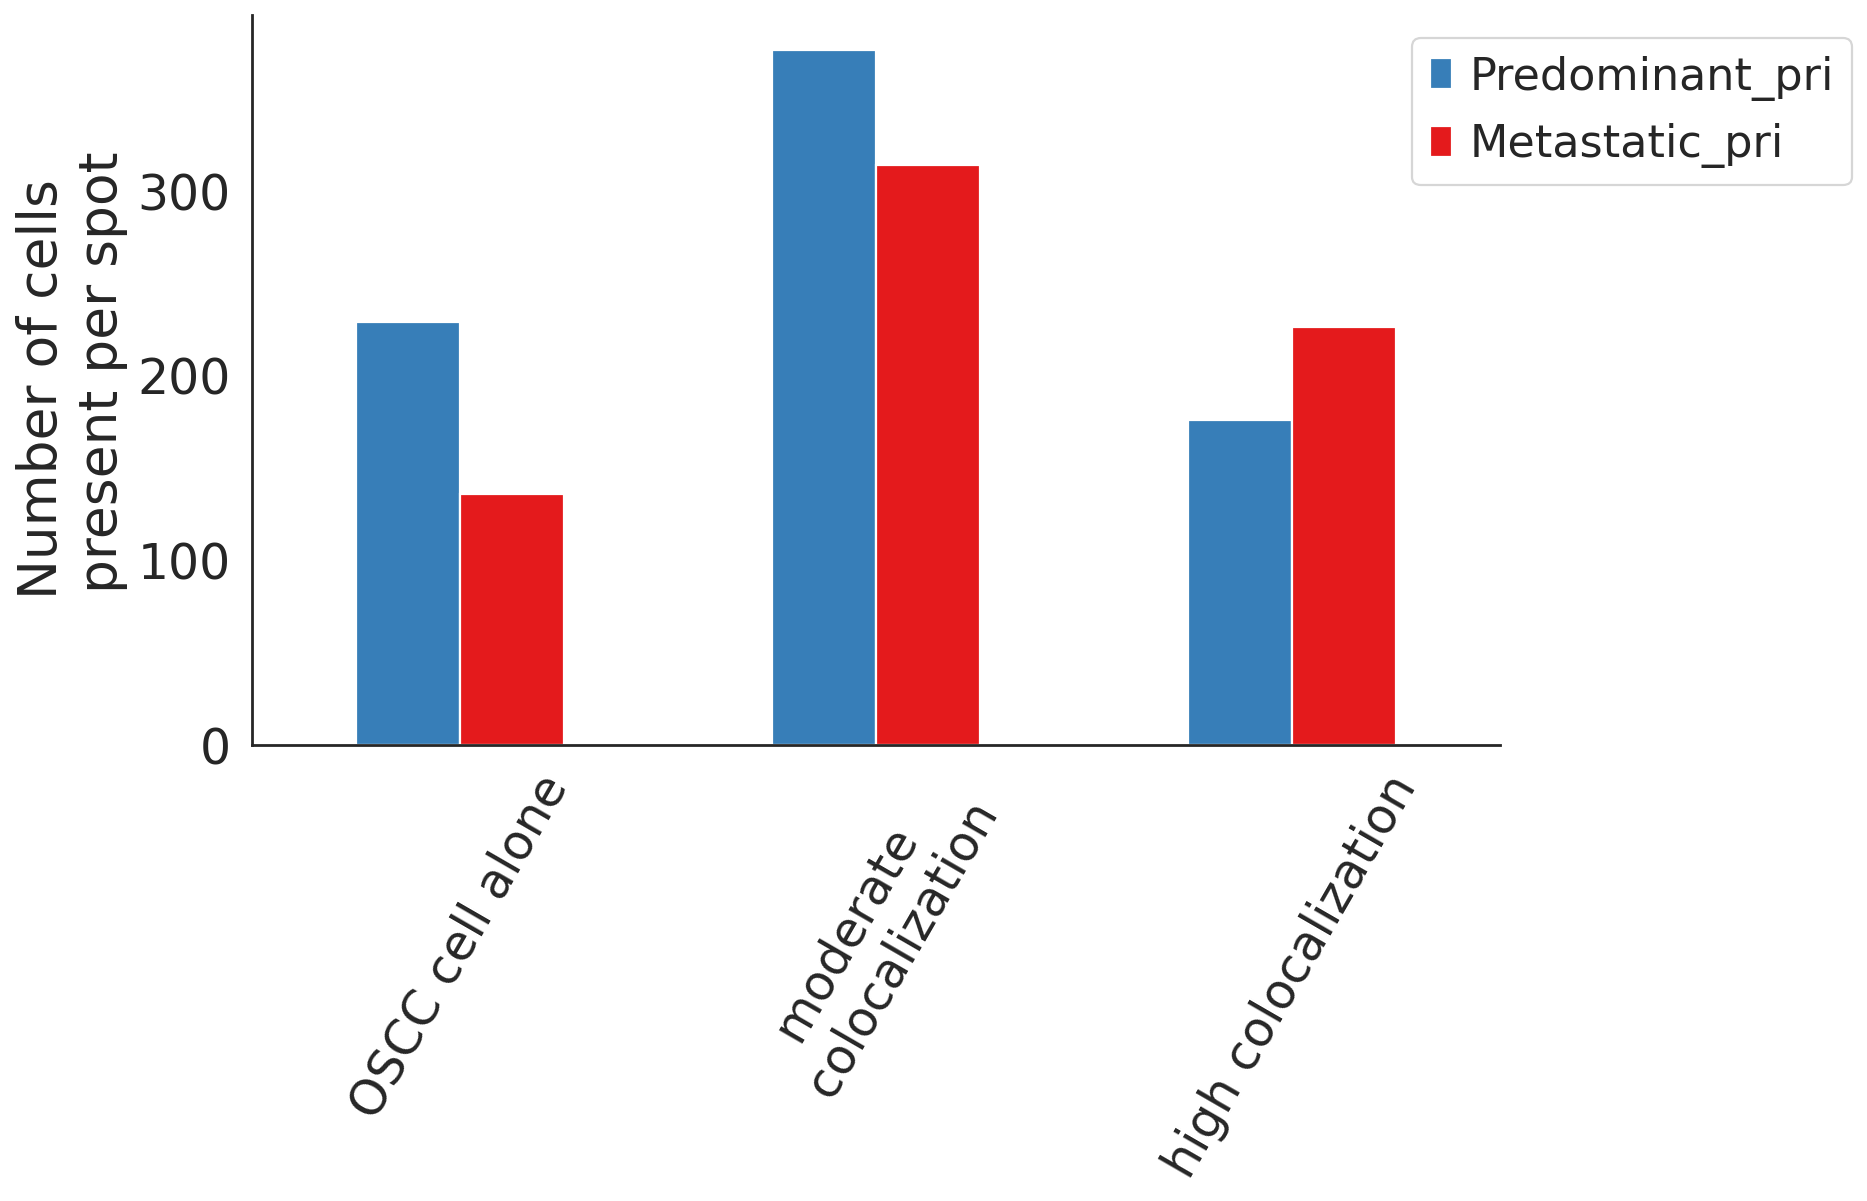

In [ ]:
sns.set(font_scale=2, style='white')
one_hot_df2.plot.bar(color=['#377EB8', '#E41A1C'])
plt.legend(fontsize=20, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(ticks=[0,1,2],
           labels=['OSCC cell alone', 
                   'moderate \n colocalization', 
                   'high colocalization'
                   ],
           rotation=60)
plt.xlabel('')
plt.ylabel('Number of cells \n present per spot')
sns.despine()
plt.show()

In [ ]:
one_hot_df2/one_hot_df2.sum(axis=0)

Predominant_pri  Metastatic_pri
colocalization                                 
1                      0.293214        0.201183
2                      0.481434        0.464497
3                      0.225352        0.334320

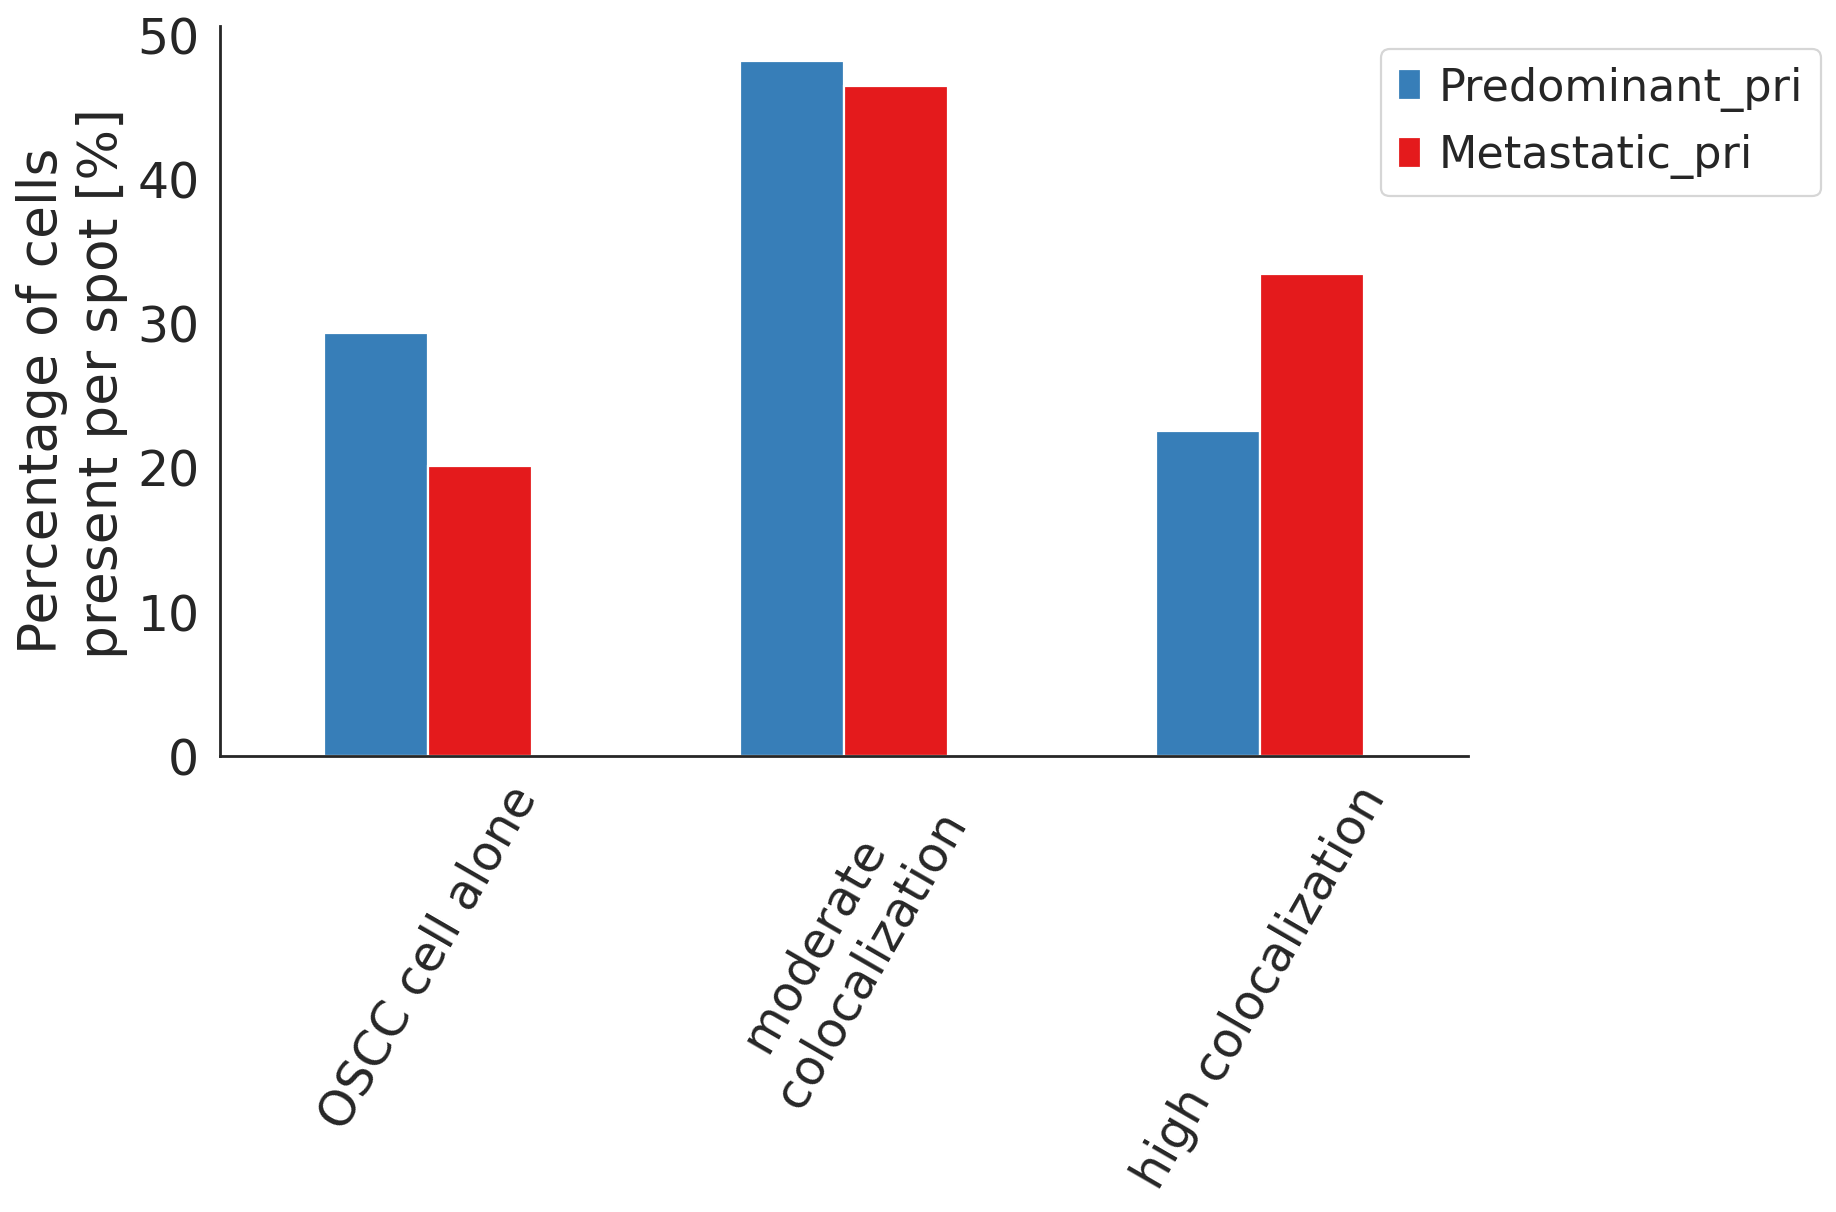

In [ ]:
sns.set(font_scale=2, style='white')
(one_hot_df2/one_hot_df2.sum(axis=0)*100).plot.bar(color=['#377EB8', '#E41A1C'])
plt.legend(fontsize=20, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(ticks=[0,1,2],
           labels=['OSCC cell alone', 
                   'moderate \n colocalization', 
                   'high colocalization'
                   ],
           rotation=60)
plt.xlabel('')
plt.ylabel('Percentage of cells \n present per spot [%]')
sns.despine()
plt.show()

In [ ]:
one_hot_df2

Predominant_pri  Metastatic_pri
colocalization                                 
1                         229.0           136.0
2                         376.0           314.0
3                         176.0           226.0

In [ ]:
fisher.test(one_hot_df2)


	Fisher's Exact Test for Count Data

data:  one_hot_df2
p-value = 7.642e-07
alternative hypothesis: two.sided

